In [2]:
reset -fs

In [3]:
# this only need to be run once
%load_ext rpy2.ipython

In [38]:
import pandas as pd
import numpy as np
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [106]:
distract=pd.read_csv('word_cloud.csv',dtype={'dridistract': int})
distract['reason']=distract['reason'].apply(lambda x: x.replace(' ','_'))
distract.head()

,dridistract,reason
0,1,Looked_But_Did_Not_See
1,3,By_Other_Occupant(s)
2,4,By_A_Moving_Object_In_Vehicle
3,5,While_Talking_Or_Listening_To_Cellular_Phone
4,6,While_Manipulating_Cellular_Phone


In [107]:
distract.loc[distract.reason.str.contains('Cellular', regex=False), 'reason'] = 'Cellular_Phone_Related'
distract

,dridistract,reason
0,1,Looked_But_Did_Not_See
1,3,By_Other_Occupant(s)
2,4,By_A_Moving_Object_In_Vehicle
3,5,Cellular_Phone_Related
4,6,Cellular_Phone_Related
5,7,Adjusting_Audio_Or_Climate_Controls
6,9,While_Using_Other_Component/Controls_Integral_...
7,10,While_Using_Or_Reaching_For_Object
8,12,"Distracted_By_Outside_Person,_Object_Or_Event"
9,13,Eating_Or_Drinking


# 2010

In [116]:
data2010 = pd.read_csv('data/fars_2010_36.csv',dtype={'dridistract': str})
data2010_distract = data2010[['dridistract']]
data2010_distract['dridistract']= data2010_distract['dridistract'].str[:2]
data2010_distract['dridistract'] = data2010_distract['dridistract'].astype(int)
data2010_distract = pd.merge(data2010_distract,distract,how='left',on='dridistract')
data2010_distract = data2010_distract.dropna()

/Users/lisachua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lisachua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [117]:
data2010_distract.head()

,dridistract,reason
75,92,Distraction
76,92,Distraction
110,15,Cellular_Phone_Related
185,6,Cellular_Phone_Related
217,10,While_Using_Or_Reaching_For_Object


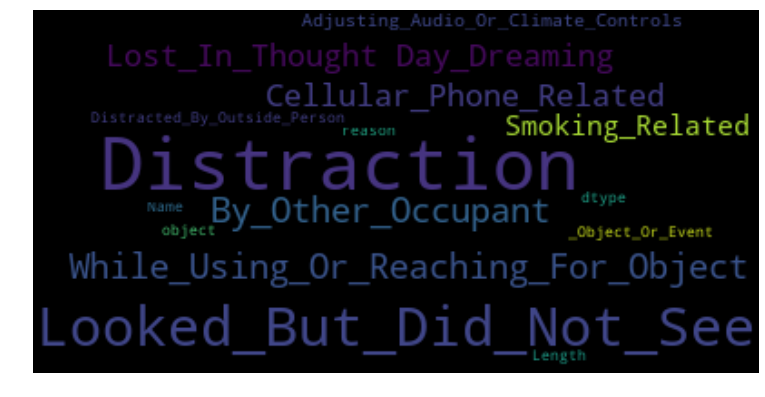

In [118]:
text = str(data2010_distract['reason'])
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(13, 10)
plt.show()

# 2016

In [119]:
data2016 = pd.read_csv('data/fars_2016_36.csv',dtype={'dridistract': str})
data2016_distract = data2016[['dridistract']]
data2016_distract['dridistract']= data2016_distract['dridistract'].str[:2]
data2016_distract['dridistract'] = data2016_distract['dridistract'].astype(int)
data2016_distract = pd.merge(data2016_distract,distract,how='left',on='dridistract')
data2016_distract = data2016_distract.dropna()

/Users/lisachua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lisachua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


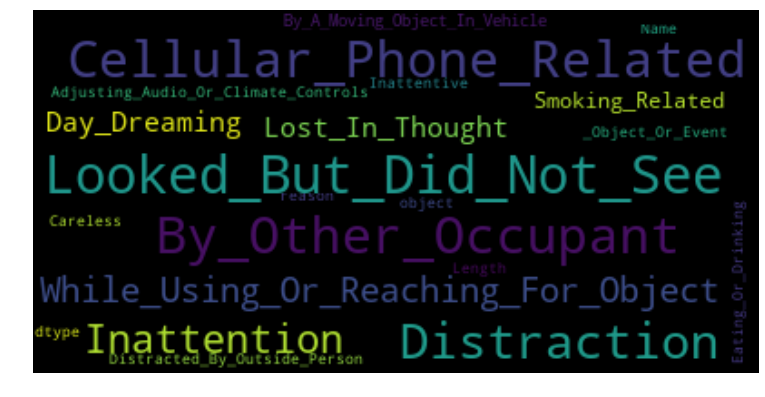

In [121]:
text = str(data2016_distract['reason'])
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(13, 10)
plt.show()